# Text Preprocessing and EDA
## Introduction

This is an Natural Language Processing project in which the goal is to develop a model that can predict the toxicity in a comment or any particular sentence. The dataset contains a lot of comments, reviews, and other general sentences. There are 6 categories, in which each one will represent certain degree of toxicity. These categories are **Toxic, Severe Toxic, Obscene, Threat, Insult, Hatred**. Each sentence is given a value either 0 or 1 for each category. 0 means the sentence does not belong to that category and 1 means it belongs to that category.

So, all the sentences are marked with these 6 categories. Like a sentence can be toxic, obscene, and insulting, for which these 3 categories will have the value 1 and the other 3 will have the value 0. Since, each sentence can belong to multiple categories the final solution will make predictions as a combinations of these multiple categories. And this makes this a **multi-label classification problem**.

The initial step in this project will be the **text preprocessing** which is to clean the data and the **exploratory data analysis** to get a better understanding of the data.

The **Text Preprocessing** involves - 
1. the tokenization of the text data, 
2. lowering the case of all letters, 
3. removing the stop words and unwanted characters, 
4. then converting all words to their base form using the stemming or lemmatization techniques. 

This process will clean the text and make everything suitable to be used during the EDA and the model building phases.

The **EDA** process involves exploration of the text data. Here, different methods are there to explore the data. We can check -
1. the frequently occuring words or check the words frequency, 
2. extract named entities like people or organization names in the text, 
3. extract the nouns and verbs in the text data, 
4. make word cloud plots that will display all the words in the text with the size of the word proportional to its frequency.

## Importing the libraries

In [2]:
import re
import nltk
import string
import spacy
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_excel('train.xlsx')
data

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
165999  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
166000  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
166001  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
166002  fff125370e4aaaf3  And it looks like it was actually you who put ...   
166003  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

       toxic severe_toxic obscene threat insult identity_hate Unnamed: 8  \
0          0            0       0      0      0             0        NaN   
1          0            0       0      0      0             0        NaN   
2          0            0       0      0      0             0        NaN   
3          0            0       0      0      0             0        NaN   
4          0            0       0      0      0             0        NaN   
...      ...          ...     ...    ...    ...           ...        ...   
165999     0            0       0      0      0             0        NaN   
166000     0            0       0      0      0             0        NaN   
166001     0            0       0      0      0             0        NaN   
166002     0            0       0      0      0             0        NaN   
166003     0            0       0      0      0             0        NaN   

       Unnamed: 9  ... Unnamed: 33 Unnamed: 34 Unnamed: 35 Unnamed: 36  \
0             NaN  ...         NaN         NaN         NaN         NaN   
1             NaN  ...         NaN         NaN         NaN         NaN   
2             NaN  ...         NaN         NaN         NaN         NaN   
3             NaN  ...         NaN         NaN         NaN         NaN   
4             NaN  ...         NaN         NaN         NaN         NaN   
...           ...  ...         ...         ...         ...         ...   
165999        NaN  ...         NaN         NaN         NaN         NaN   
166000        NaN  ...         NaN         NaN         NaN         NaN   
166001        NaN  ...         NaN         NaN         NaN         NaN   
166002        NaN  ...         NaN         NaN         NaN         NaN   
166003        NaN  ...         NaN         NaN         NaN         NaN   

       Unnamed: 37 Unnamed: 38 Unnamed: 39 Unnamed: 40 Unnamed: 41 Unnamed: 42  
0              NaN         NaN         NaN         NaN         NaN         NaN  
1              NaN         NaN         NaN         NaN         NaN         NaN  
2              NaN         NaN         NaN         NaN         NaN         NaN  
3              NaN         NaN         NaN         NaN         NaN         NaN  
4              NaN         NaN         NaN         NaN         NaN         NaN  
...            ...         ...         ...         ...         ...         ...  
165999         NaN         NaN         NaN         NaN         NaN         NaN  
166000         NaN         NaN         NaN         NaN         NaN         NaN  
166001         NaN         NaN         NaN         NaN         NaN         NaN  
166002         NaN         NaN         NaN         NaN         NaN         NaN  
166003         NaN         NaN         NaN         NaN         NaN         NaN  

[166004 rows x 43 columns]

In [7]:
data1 = data[['comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
data1

comment_text toxic severe_toxic  \
0       Explanation\nWhy the edits made under my usern...     0            0   
1       D'aww! He matches this background colour I'm s...     0            0   
2       Hey man, I'm really not trying to edit war. It...     0            0   
3       "\nMore\nI can't make any real suggestions on ...     0            0   
4       You, sir, are my hero. Any chance you remember...     0            0   
...                                                   ...   ...          ...   
165999  ":::::And for the second time of asking, when ...     0            0   
166000  You should be ashamed of yourself \n\nThat is ...     0            0   
166001  Spitzer \n\nUmm, theres no actual article for ...     0            0   
166002  And it looks like it was actually you who put ...     0            0   
166003  "\nAnd ... I really don't think you understand...     0            0   

       obscene threat insult identity_hate  
0            0      0      0             0  
1            0      0      0             0  
2            0      0      0             0  
3            0      0      0             0  
4            0      0      0             0  
...        ...    ...    ...           ...  
165999       0      0      0             0  
166000       0      0      0             0  
166001       0      0      0             0  
166002       0      0      0             0  
166003       0      0      0             0  

[166004 rows x 7 columns]

In [8]:
data1['comment_text'].isnull().value_counts()

False    160787
True       5217
Name: comment_text, dtype: int64

In [9]:
data2 = data1.dropna()

In [10]:
data2['comment_text'].isnull().value_counts()

False    159073
Name: comment_text, dtype: int64

In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159073 entries, 0 to 166003
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   comment_text   159073 non-null  object
 1   toxic          159073 non-null  object
 2   severe_toxic   159073 non-null  object
 3   obscene        159073 non-null  object
 4   threat         159073 non-null  object
 5   insult         159073 non-null  object
 6   identity_hate  159073 non-null  object
dtypes: object(7)
memory usage: 9.7+ MB


In [12]:
data2.head(20)

comment_text  \
0   Explanation\nWhy the edits made under my usern...   
1   D'aww! He matches this background colour I'm s...   
2   Hey man, I'm really not trying to edit war. It...   
3   "\nMore\nI can't make any real suggestions on ...   
4   You, sir, are my hero. Any chance you remember...   
5   "\n\nCongratulations from me as well, use the ...   
6        COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
7   Your vandalism to the Matt Shirvington article...   
8   Sorry if the word 'nonsense' was offensive to ...   
9   alignment on this subject and which are contra...   
13   so the copyright status is unclear. If you di...   
17   consider checking that you have specified the...   
18  bbq \n\nbe a man and lets discuss it-maybe ove...   
19  Hey... what is it..\n@ | talk .\nWhat is it......   
20  Before you start throwing accusations and warn...   
21  Oh, and the girl above started her arguments w...   
22  "\n\nJuelz Santanas Age\n\nIn 2002, Juelz Sant...   
23  Bye! \n\nDon't look, come or think of comming ...   
24   REDIRECT Talk:Voydan Pop Georgiev- Chernodrinski   
25  The Mitsurugi point made no sense - why not ar...   

                                                toxic  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
5                                                   0   
6                                                   1   
7                                                   0   
8                                                   0   
9                                                   0   
13   then you will need to specify the owner of th...   
17   too. You can find a list of files you have up...   
18                                                  0   
19                                                  1   
20                                                  0   
21                                                  0   
22                                                  0   
23                                                  1   
24                                                  0   
25                                                  0   

                                         severe_toxic  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
5                                                   0   
6                                                   1   
7                                                   0   
8                                                   0   
9                                                   0   
13   then a link to the website from which it was ...   
17   as described on criteria for speedy deletion....   
18                                                  0   
19                                                  0   
20                                                  0   
21                                                  0   
22                                                  0   
23                                                  0   
24                                                  0   
25                                                  0   

                                              obscene  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
5                                                   0   
6                                               

-----------

Here there are some rows with improperly arranged data. These rows should be removed.

-----------

In [16]:
data2[(data2['toxic'] != 0) & (data2['toxic'] != 1)]

comment_text  \
13       so the copyright status is unclear. If you di...   
17       consider checking that you have specified the...   
142                                    regardless of race   
150                     Witzemen were considered outcasts   
2159    After eight years of editing, you bet I've rea...   
...                                                   ...   
163445                                    FOR SOME REASON   
164320  "! Thanks for experimenting with Wikipedia. Yo...   
164395    said that making Twitter a Good article woul...   
164826   something you seem to be having difficulty wi...   
165717  No problem, I understand.  Cheers,_x0014_(yo...   

                                                    toxic  \
13       then you will need to specify the owner of th...   
17       too. You can find a list of files you have up...   
142                                                   age   
150      and young children were encouraged to poke th...   
2159                                   2012; 02:01 (UTC)"   
...                                                   ...   
163445   """"Unsourced content is a scourge to editors...   
164320                                   9 April 2006]"""   
164395   should we list Twitter as a Good Article cand...   
164826   and also on the talk pages with your communic...   
165717                                        February16   

                                             severe_toxic  \
13       then a link to the website from which it was ...   
17       as described on criteria for speedy deletion....   
142      character or knowledge. The outside world kno...   
150      as he and his followers were embarassingly pr...   
2159                                                    0   
...                                                   ...   
163445                                                  0   
164320                                                  0   
164395   does anyone think we've missed the Good artic...   
164826   so I'd advise modifying your behavior before ...   
165717                                        2009 (UTC)"   

                                                  obscene  \
13       together with a restatement of that website's...   
17                                                      0   
142      and the honour of the Witzeman. For those who...   
150      building up to a great moment in the history....   
2159                                                    0   
...                                                   ...   
163445                                                  0   
164320                                                  0   
164395                                                  0   
164826                                                  0   
165717                                                  0   

                                               threat  \
13         is usually sufficient information. However   
17                                                  0   
142      it has been said to have been a great honour   
150                               wearing clown masks   
2159                                                0   
...                                               ...   
163445                                              0   
164320                                              0   
164395                                              0   
164826                                              0   
165717                                              0   

                                                   insult  \
13       if the copyright holder is different from the...   
17                                                      0   
142      although the qualities needed for the job hav...   
150      but otherwise completely naked. This was thou...   
2159                                                    0   
...                                                   ...   
1

In [18]:
data3 = data2[(data2['toxic'] == 0) | (data2['toxic'] == 1)]
data3

comment_text toxic severe_toxic  \
0       Explanation\nWhy the edits made under my usern...     0            0   
1       D'aww! He matches this background colour I'm s...     0            0   
2       Hey man, I'm really not trying to edit war. It...     0            0   
3       "\nMore\nI can't make any real suggestions on ...     0            0   
4       You, sir, are my hero. Any chance you remember...     0            0   
...                                                   ...   ...          ...   
165999  ":::::And for the second time of asking, when ...     0            0   
166000  You should be ashamed of yourself \n\nThat is ...     0            0   
166001  Spitzer \n\nUmm, theres no actual article for ...     0            0   
166002  And it looks like it was actually you who put ...     0            0   
166003  "\nAnd ... I really don't think you understand...     0            0   

       obscene threat insult identity_hate  
0            0      0      0             0  
1            0      0      0             0  
2            0      0      0             0  
3            0      0      0             0  
4            0      0      0             0  
...        ...    ...    ...           ...  
165999       0      0      0             0  
166000       0      0      0             0  
166001       0      0      0             0  
166002       0      0      0             0  
166003       0      0      0             0  

[158743 rows x 7 columns]

In [22]:
print(data3['toxic'].value_counts())
print('-'*20)
print(data3['severe_toxic'].value_counts())
print('-'*20)
print(data3['obscene'].value_counts())
print('-'*20)
print(data3['threat'].value_counts())
print('-'*20)
print(data3['insult'].value_counts())
print('-'*20)
print(data3['identity_hate'].value_counts())
print('-'*20)

0    143490
1     15253
Name: toxic, dtype: int64
--------------------
0    157150
1      1593
Name: severe_toxic, dtype: int64
--------------------
0    150319
1      8424
Name: obscene, dtype: int64
--------------------
0    158268
1       475
Name: threat, dtype: int64
--------------------
0    150883
1      7860
Name: insult, dtype: int64
--------------------
0    157340
1      1403
Name: identity_hate, dtype: int64
--------------------


In [23]:
data_final = data3
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158743 entries, 0 to 166003
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   comment_text   158743 non-null  object
 1   toxic          158743 non-null  object
 2   severe_toxic   158743 non-null  object
 3   obscene        158743 non-null  object
 4   threat         158743 non-null  object
 5   insult         158743 non-null  object
 6   identity_hate  158743 non-null  object
dtypes: object(7)
memory usage: 9.7+ MB


In [24]:
data_final.to_excel('cleaned_data.xlsx')

## Text cleaning

A single function that contains all the operations that should be applied to the text data. This function takes in the text data, applies all the functions and then returns the cleaned text.

In [29]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

import string
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harivars\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\harivars\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harivars\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\harivars\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [46]:
def clean_text(text):
    # lower text
    text=str(text)
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [35]:
data_final['comment_text'][85].lower()

", 20 december 2006 (utc)\n\nyou must not play metal gear solid 2 that often. gw is the arsenal gear a.i. that went haywire after solid snake uploaded emma's virus.  19:32"

In [47]:
clean_text(data_final['comment_text'][85])

"december utc)\n\nyou must play metal gear solid often gw arsenal gear a.i go haywire solid snake uploaded emma's virus"

#### Another function to clean text using regular expressions

In [56]:
def clean_text2(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    stop_words = stopwords.words('english')
    stop_words.append('utc')
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stop_words]
    pos_tags = pos_tag(filtered_words)
    lemmatized_words = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    return " ".join(lemmatized_words)

In [57]:
clean_text2(data_final['comment_text'][85])

'december must play metal gear solid often arsenal gear go haywire solid snake uploaded emma virus'

In [58]:
data_final['cleaned_comments'] = data_final['comment_text'].apply(clean_text2)
data_final

comment_text toxic severe_toxic  \
0       Explanation\nWhy the edits made under my usern...     0            0   
1       D'aww! He matches this background colour I'm s...     0            0   
2       Hey man, I'm really not trying to edit war. It...     0            0   
3       "\nMore\nI can't make any real suggestions on ...     0            0   
4       You, sir, are my hero. Any chance you remember...     0            0   
...                                                   ...   ...          ...   
165999  ":::::And for the second time of asking, when ...     0            0   
166000  You should be ashamed of yourself \n\nThat is ...     0            0   
166001  Spitzer \n\nUmm, theres no actual article for ...     0            0   
166002  And it looks like it was actually you who put ...     0            0   
166003  "\nAnd ... I really don't think you understand...     0            0   

       obscene threat insult identity_hate  \
0            0      0      0             0   
1            0      0      0             0   
2            0      0      0             0   
3            0      0      0             0   
4            0      0      0             0   
...        ...    ...    ...           ...   
165999       0      0      0             0   
166000       0      0      0             0   
166001       0      0      0             0   
166002       0      0      0             0   
166003       0      0      0             0   

                                         cleaned_comments  
0       explanation edits make username hardcore metal...  
1       aww match background colour seemingly stuck th...  
2       hey man really try edit war guy constantly rem...  
3       make real suggestion improvement wonder sectio...  
4                           sir hero chance remember page  
...                                                   ...  
165999  second time ask view completely contradict cov...  
166000               ashamed horrible thing put talk page  
166001  spitzer umm there actual article prostitution ...  
166002  look like actually put speedy first version de...  
166003  really think understand come idea bad right aw...  

[158743 rows x 8 columns]

In [59]:
data_clean = data_final.drop('comment_text', axis = 1)
data_clean

toxic severe_toxic obscene threat insult identity_hate  \
0          0            0       0      0      0             0   
1          0            0       0      0      0             0   
2          0            0       0      0      0             0   
3          0            0       0      0      0             0   
4          0            0       0      0      0             0   
...      ...          ...     ...    ...    ...           ...   
165999     0            0       0      0      0             0   
166000     0            0       0      0      0             0   
166001     0            0       0      0      0             0   
166002     0            0       0      0      0             0   
166003     0            0       0      0      0             0   

                                         cleaned_comments  
0       explanation edits make username hardcore metal...  
1       aww match background colour seemingly stuck th...  
2       hey man really try edit war guy constantly rem...  
3       make real suggestion improvement wonder sectio...  
4                           sir hero chance remember page  
...                                                   ...  
165999  second time ask view completely contradict cov...  
166000               ashamed horrible thing put talk page  
166001  spitzer umm there actual article prostitution ...  
166002  look like actually put speedy first version de...  
166003  really think understand come idea bad right aw...  

[158743 rows x 7 columns]

In [60]:
data_clean.to_excel('cleaned_text.xlsx')

## EDA
### Frequently occuring words

In [63]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harivars\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
stopWords = set(stopwords.words('english')+['``',"''"])
total_words =[]
sentences = data_clean['cleaned_comments'].values
cleaned_sentences = ""
for sentence in sentences:
    cleaned_text = clean_text(sentence)
    cleaned_sentences += cleaned_text
    required_words = nltk.word_tokenize(cleaned_text)
    for word in required_words:
        if word not in stopWords and word not in string.punctuation:
            total_words.append(word)
    
word_freq_dist = nltk.FreqDist(total_words)
most_common_words = word_freq_dist.most_common(50)
print(most_common_words)

[('article', 72979), ('page', 55664), ('wikipedia', 44830), ('talk', 37751), ('use', 31666), ('edit', 31488), ('one', 30241), ('make', 29809), ('please', 29274), ('would', 28951), ('like', 28373), ('see', 25205), ('say', 25176), ('think', 25144), ('know', 23712), ('source', 23090), ('get', 21585), ('also', 20277), ('time', 19074), ('add', 18731), ('people', 18668), ('user', 17394), ('block', 15904), ('well', 15742), ('need', 15525), ('may', 15393), ('take', 15060), ('want', 14943), ('good', 14800), ('delete', 14707), ('find', 14582), ('name', 14536), ('link', 14472), ('image', 14313), ('remove', 14170), ('look', 13731), ('work', 13672), ('thanks', 13517), ('even', 13470), ('fuck', 13254), ('write', 12374), ('information', 12060), ('change', 12041), ('way', 12024), ('list', 11853), ('could', 11808), ('give', 11801), ('comment', 11777), ('help', 11687), ('editor', 11566)]


### Recognizing named entities

In [82]:
nlp = spacy.load('en_core_web_lg')
nlp.max_length = 37000000
block = cleaned_sentences[1300:5200]
doc_block = nlp(block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

### Parts of speech tagging
Using the spacy package function '.pos_', we can tag the corresponding parts of speech to each word.

In [83]:
for token in doc_block[:30]:
    print(token, token.pos_) 

ion NOUN
ask VERB
sityush PROPN
clean ADJ
behavior NOUN
issue NOUN
nonsensical PROPN
warningstart PROPN
throw NOUN
accusation NOUN
warn VERB
let VERB
review NOUN
edit VERB
make VERB
hominem ADJ
attack NOUN
go VERB
strengthen VERB
argument NOUN
merely ADV
make VERB
look VERB
like ADP
abuse NOUN
power NOUN
admin NOUN
edit NOUN
relevant ADJ
probably ADV


### Nouns and Verbs

In [84]:
block = cleaned_sentences[1300:5200]
doc_block = nlp(block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[:250])

['ion', 'ask', 'behavior', 'issue', 'throw', 'accusation', 'warn', 'let', 'review', 'edit', 'make', 'attack', 'go', 'strengthen', 'argument', 'make', 'look', 'abuse', 'power', 'admin', 'edit', 'talk', 'event', 'int', 'news', 'absence', 'president', 'attend', 'aircracft', 'carrier', 'intend', 'revert', 'edit', 'hop', 'attract', 'attention', 'admin', 'look', 'issue', 'throw', 'accusation', 'achieve', 'level', 'civility', 'discussion', 'topic', 'resolve', 'matter', 'start', 'nose', 'belong', 'believe', 'argument', 'say', 'situation', 'settle', 'apologized', 'come', 'make', 'turn', 'make', 'song', 'diplomat', 'come', 'town', 'bear', 'birthday', 'pass', 'death', 'forbid', 'think', 'caculator', 'stop', 'change', 'year', 'birth', 'godbye', 'come', 'think', 'comming', 'point', 'make', 'sense', 'argue', 'include', 'page', 'include', 'bother', 'see', 'write', 'regard', 'remove', 'post', 'discuss', 'ask', 'take', 'look', 'wrestle', 'death', 'catagory', 'men', 'list', 'men', 'belong', 'catagory', 

### Adding a word count

In [85]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word, sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words', 'Count']
wd_df[0:15]

Words  Count
0       edit     10
1       make      8
2    article      6
3       look      5
4      think      5
5   argument      4
6       page      4
7        ask      3
8      throw      3
9       come      3
10   include      3
11     write      3
12      post      3
13  catagory      3
14      list      3

### Graphical representation of word counts

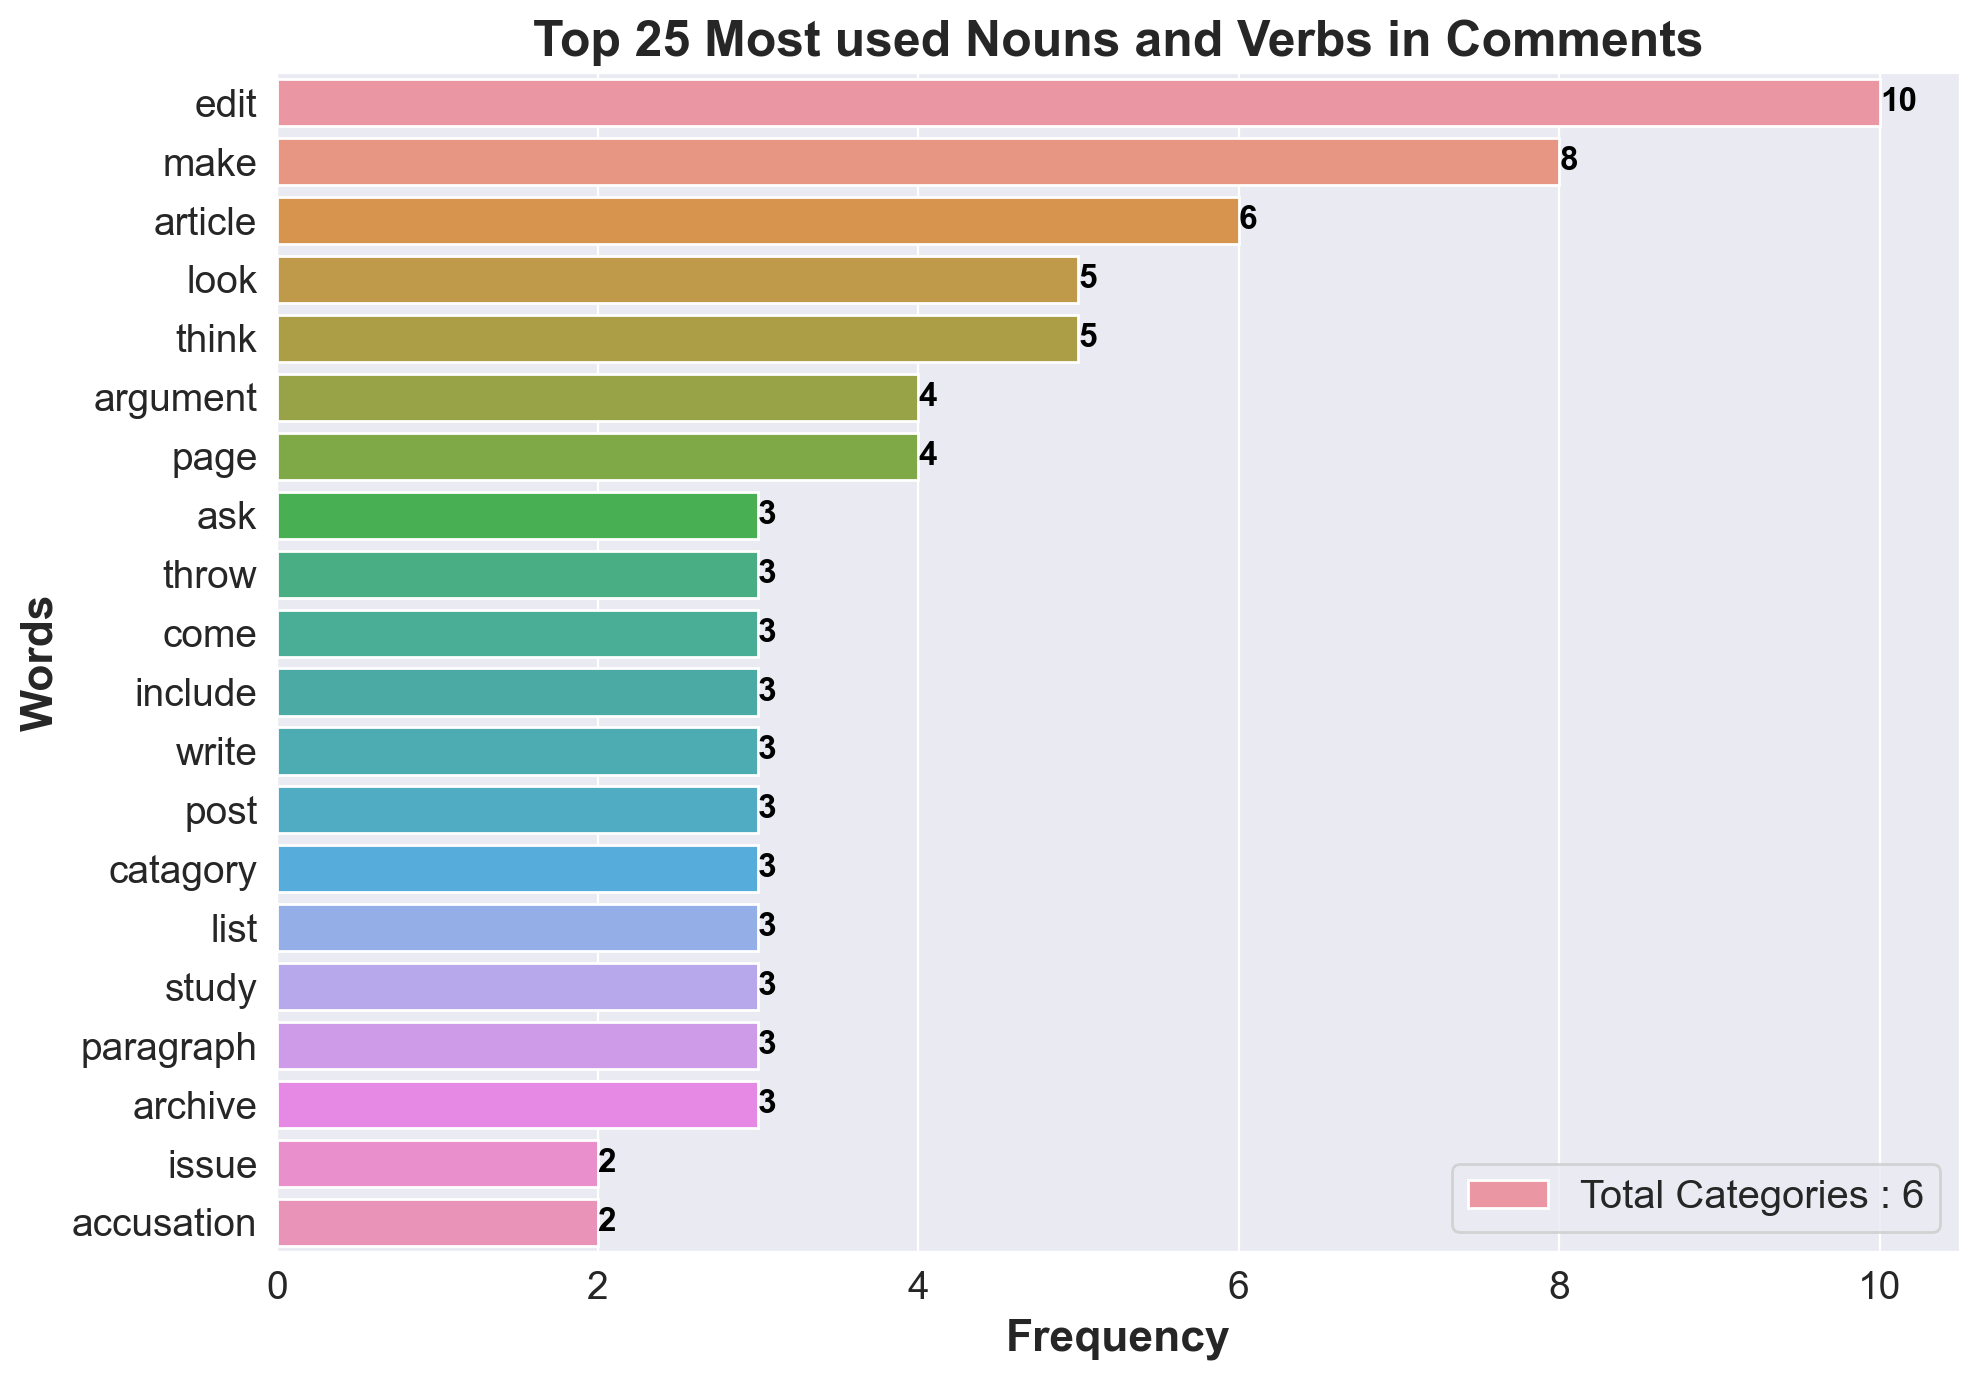

In [86]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Categories : 6')

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Comments', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

### Word cloud

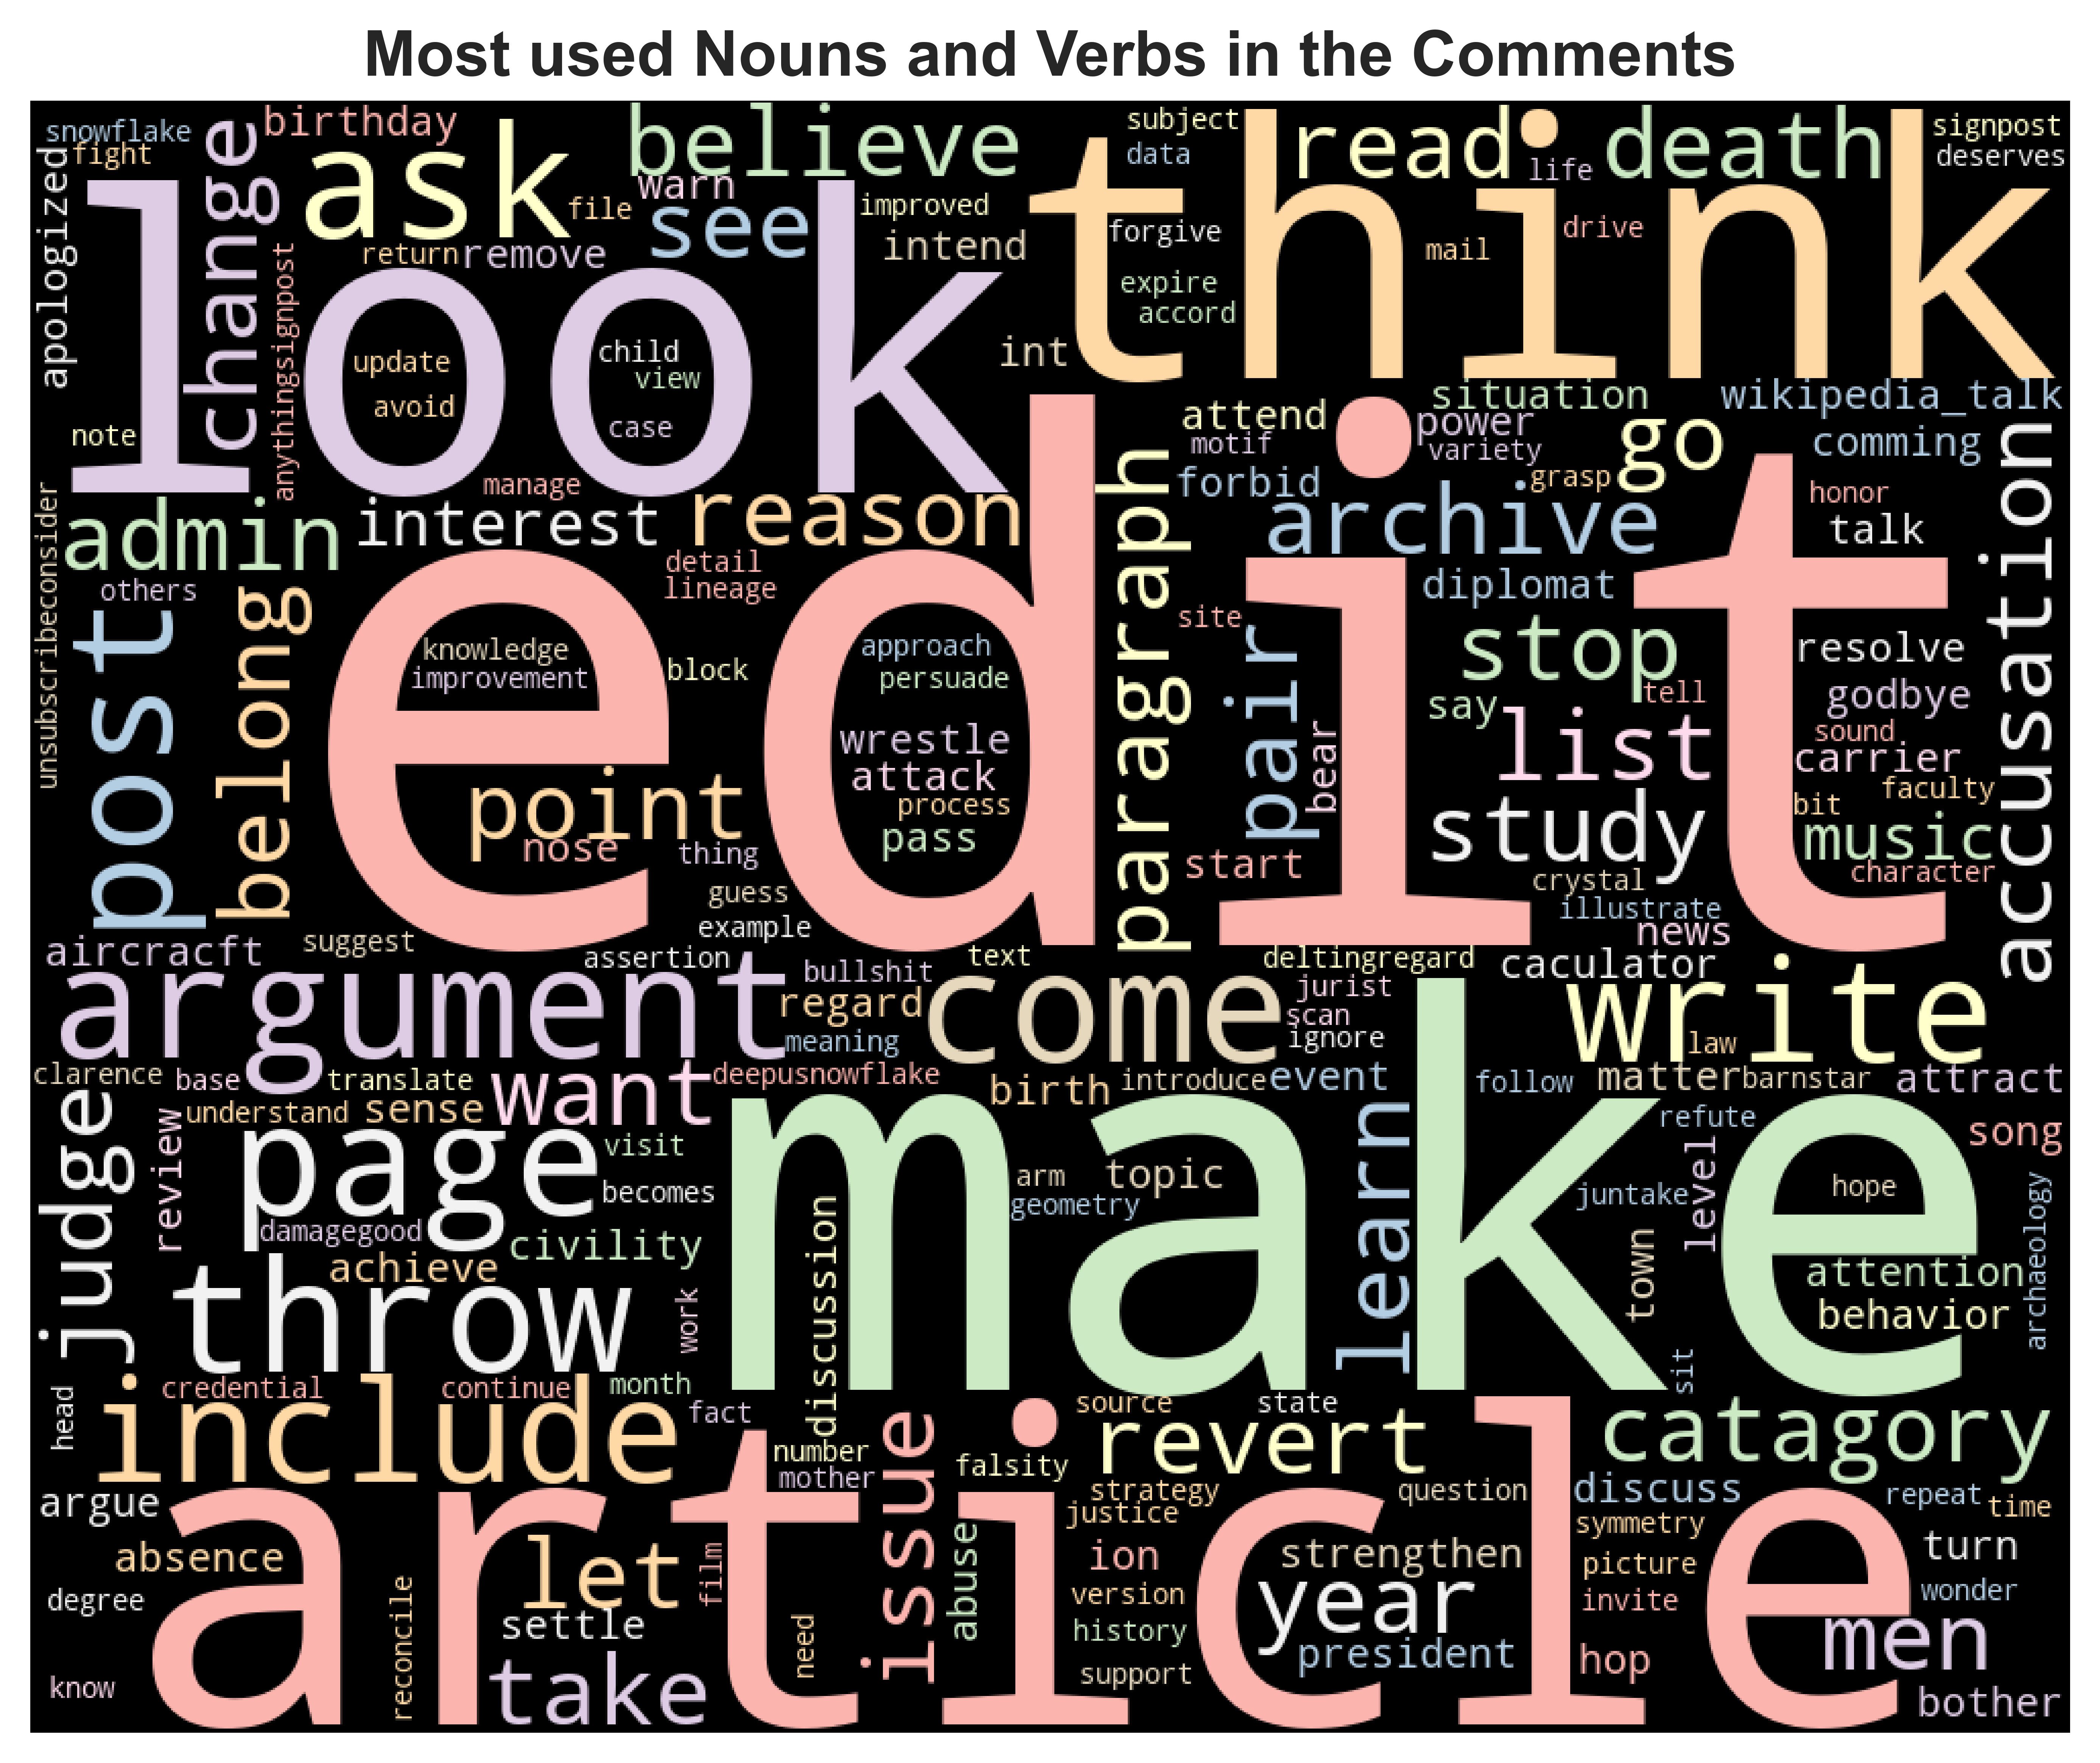

In [98]:
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in the Comments', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

plt.show()

### Word cloud of different categories

Here word clouds of the text data of specific categories can be seen. This will help us in understanding which words are highly influencing a sentence to belong to particular category.

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

In [90]:
show_wordcloud(data_clean['cleaned_comments'])

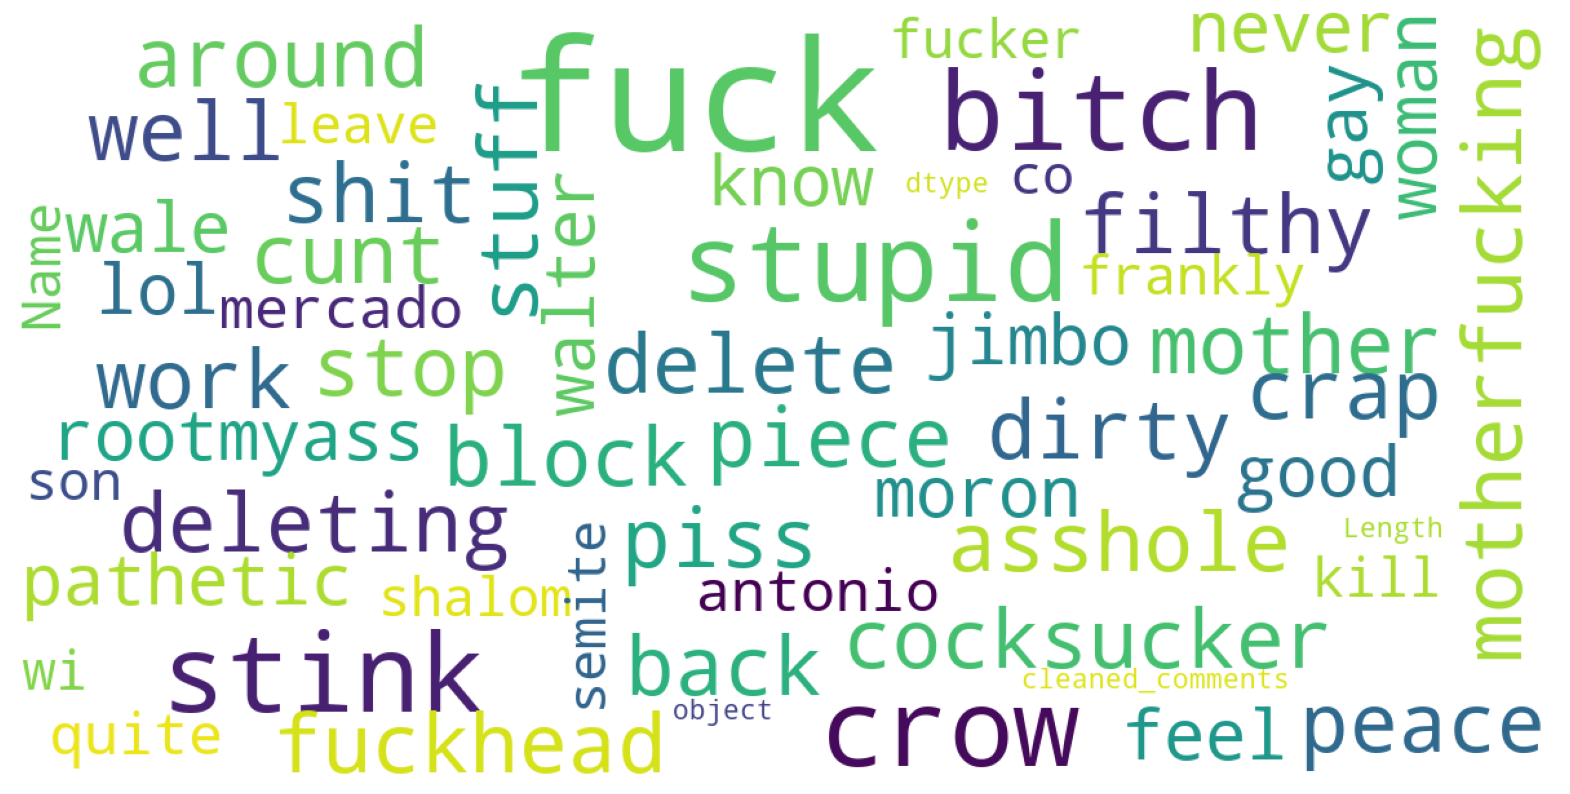

In [91]:
show_wordcloud(data_clean[data_clean['severe_toxic'] == 1]['cleaned_comments'])

In [94]:
show_wordcloud(data_clean[(data_clean['identity_hate'] == 1) & (data_clean['severe_toxic'] == 0)]['cleaned_comments'])

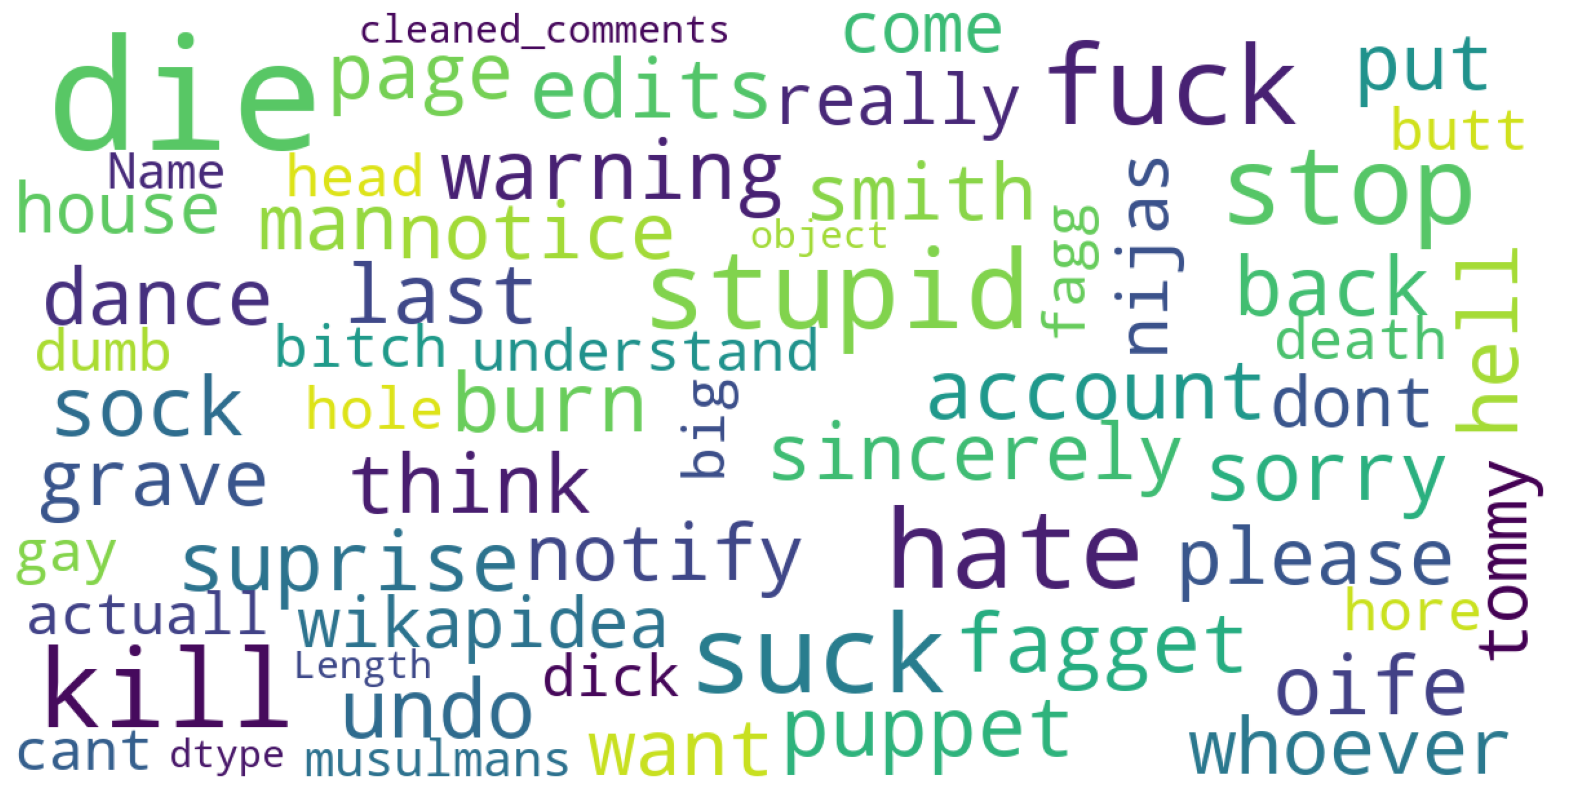

In [96]:
show_wordcloud(data_clean[(data_clean['threat'] == 1) & (data_clean['severe_toxic'] == 0)]['cleaned_comments'])

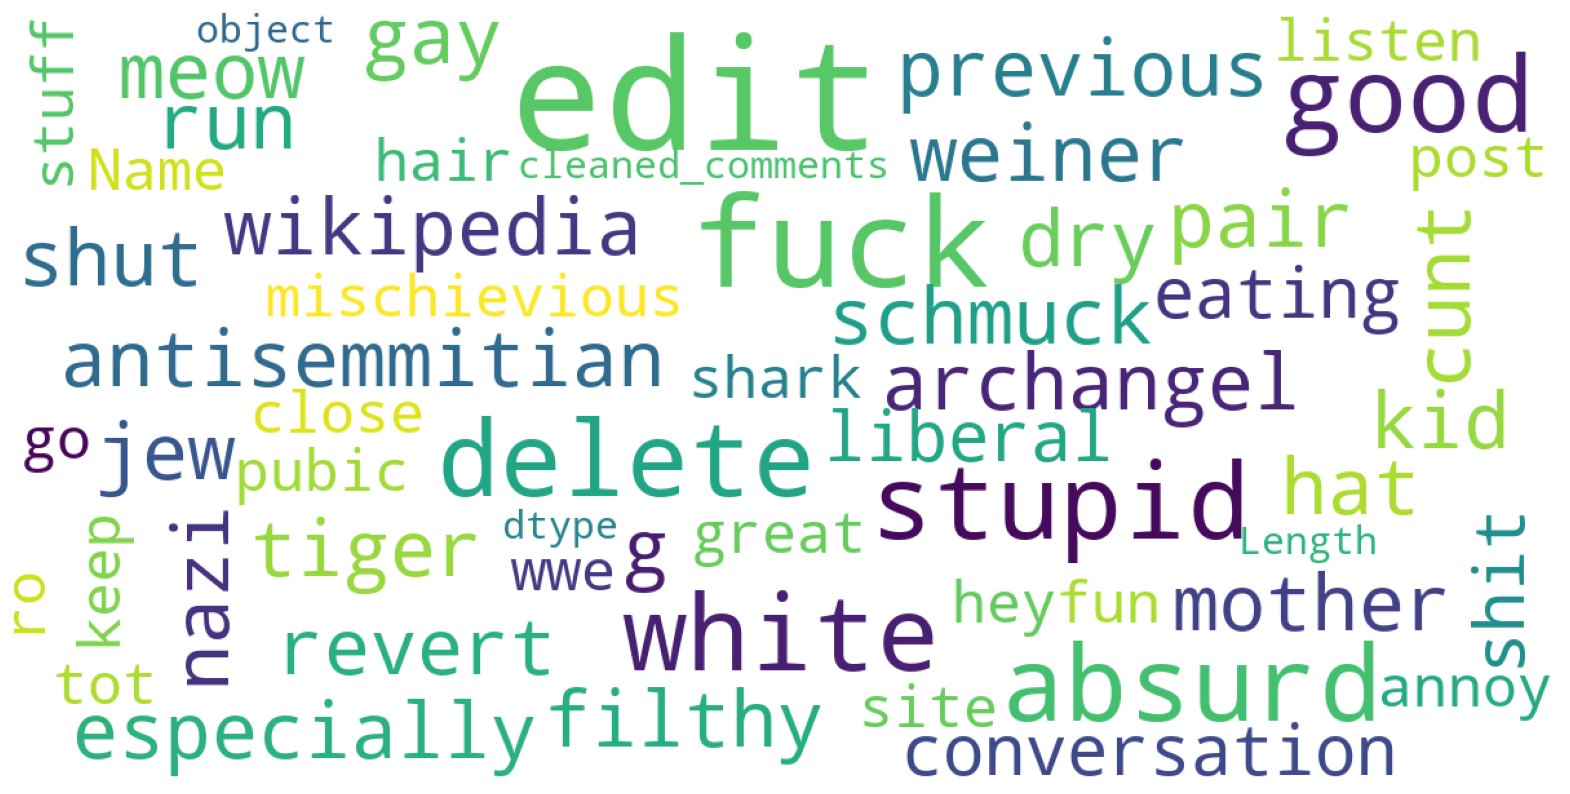

In [97]:
show_wordcloud(data_clean[(data_clean['insult'] == 1) & (data_clean['severe_toxic'] == 0)]['cleaned_comments'])

--------------------

Now that the text data is cleaned the next step will be to build a machine learning model that shall be trained on this text data. In order to train the model the text data has to be converted into a vector form. So, the next immediate step would be vectorize the text data. Different techniques are available which are **One-Hot Encoding, Bag of Words or Count Vectorizer, TF-IDF Vectorizer**, out of which the **TF-IDF Vectorizer** is known to give the best results. Alternatively another model called as **Word2Vec** can be used. This model also preserves the semantic meaning of a word and its association with other words which makes it very suitable in a generative models. But since this is a text classification model the **TF-IDF** vectorization is quite sufficient.

After the vectorization the next step would be train the models on this vectorized data.